In [1]:
import loompy
import os
import pandas as pd
import numpy as np
import re
import gc
from matplotlib import pyplot as plt

/home/owenwhitley/anaconda3/envs/scvelo_conda/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9002. The TBB threading layer is disabled.
  warnings.warn(problem)


In [2]:
top_dir = "/home/owenwhitley/projects/su2c_v2"
data_dir = os.path.join(top_dir, 'data/preprocessed/scRNA/velocyto_GBM_GSCs_split_by_sample_no_G800_L')
merged_file = os.path.join(data_dir, 'GBM_GSCs_combined.loom')

In [3]:
merged_con = loompy.connect(merged_file)
merged_con.shape

(60675, 79862)

In [4]:
# Load PCA coords + metadata
plot_data = pd.read_csv(os.path.join(data_dir, 'scvelo_plot_data_GBM_GSCs_PCA_full.csv'))
plot_data

,Unnamed: 0,nGene,nUMI,orig.ident,percent.mito,S.Score,G2M.Score,Phase,CC.Difference,Zhong_NPCs_upreg_AUC,...,Neftel_NPC2_AUC,Neftel_G1.S_AUC,Neftel_G2.M_AUC,Dev_IR_Diff,Stem_Astro_Diff,Dev_IR_Diff_zscore,Stem_Astro_Diff_zscore,PC1,PC2,unique_id
0,BTSC_BT127_L_AAACCTGCACGGACAA,640,875,BTSC,0.043429,0.095786,0.073037,S,0.022749,0.106631,...,0.085013,0.120975,0.071752,0.014217,0.190099,1.190880,2.364037,-12.728937,-0.553863,BT127_L_AAACCTGCACGGACAA
1,BTSC_BT127_L_AAACCTGCATCCGGGT,1036,2408,BTSC,0.002076,0.053588,0.308728,G2M,-0.255140,0.193112,...,0.070254,0.109481,0.120565,-0.033552,0.087178,0.663390,0.532745,0.942554,1.607986,BT127_L_AAACCTGCATCCGGGT
2,BTSC_BT127_L_AAACCTGGTACAGTTC,3240,10058,BTSC,0.078047,0.211906,-0.220823,S,0.432729,0.109561,...,0.110740,0.048511,0.034879,-0.012893,0.056218,0.891514,-0.018122,4.223721,17.356634,BT127_L_AAACCTGGTACAGTTC
3,BTSC_BT127_L_AAACCTGTCTACGAGT,3337,10798,BTSC,0.061863,-0.132267,-0.204643,G1,0.072376,0.071328,...,0.192393,0.005676,0.063777,-0.012814,0.051267,0.892394,-0.106222,-14.364698,12.167306,BT127_L_AAACCTGTCTACGAGT
4,BTSC_BT127_L_AAACGGGAGTGGTAAT,4140,14601,BTSC,0.081501,0.408264,0.401880,S,0.006384,0.258219,...,0.082766,0.263047,0.104503,-0.032299,0.132094,0.677231,1.331939,7.017834,23.335836,BT127_L_AAACGGGAGTGGTAAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79857,GBM_G983-C_T_TTTACTGGTACCGGCT,5909,28721,GBM,0.024164,0.535013,0.184174,S,0.350839,0.235222,...,0.060627,0.321304,0.092630,-0.053835,0.050856,0.439408,-0.113518,-9.069733,4.801780,G983-C_T_TTTACTGGTACCGGCT
79858,GBM_G983-C_T_TTTACTGTCTTGCCGT,2848,7974,GBM,0.030223,-0.155864,-0.231969,G1,0.076105,0.078931,...,0.047578,0.001785,0.049754,-0.029568,-0.047580,0.707380,-1.865008,-25.734349,-8.234643,G983-C_T_TTTACTGTCTTGCCGT
79859,GBM_G983-C_T_TTTCCTCTCGCGCCAA,3829,14498,GBM,0.040419,-0.153784,-0.297173,G1,0.143389,0.061801,...,0.056710,0.004998,0.020520,-0.077667,-0.049551,0.176242,-1.900068,-20.632510,-11.647954,G983-C_T_TTTCCTCTCGCGCCAA
79860,GBM_G983-C_T_TTTGGTTAGAGTACAT,4815,20360,GBM,0.040815,0.046580,-0.285680,S,0.332260,0.077721,...,0.065162,0.019669,0.039091,-0.055244,-0.037691,0.423850,-1.689050,-19.543192,-0.826260,G983-C_T_TTTGGTTAGAGTACAT


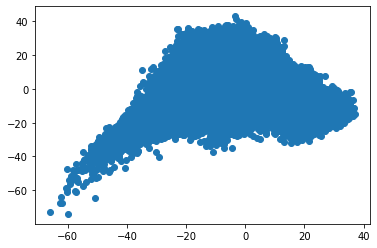

In [5]:
PCA_coords = plot_data.loc[:, ['PC1', 'PC2']].to_numpy()
plt.scatter(PCA_coords[:, 0], PCA_coords[:, 1])

In [6]:
plot_data['unique_id']

0         BT127_L_AAACCTGCACGGACAA
1         BT127_L_AAACCTGCATCCGGGT
2         BT127_L_AAACCTGGTACAGTTC
3         BT127_L_AAACCTGTCTACGAGT
4         BT127_L_AAACGGGAGTGGTAAT
                   ...            
79857    G983-C_T_TTTACTGGTACCGGCT
79858    G983-C_T_TTTACTGTCTTGCCGT
79859    G983-C_T_TTTCCTCTCGCGCCAA
79860    G983-C_T_TTTGGTTAGAGTACAT
79861    G983-C_T_TTTGGTTGTTACGACT
Name: unique_id, Length: 79862, dtype: object

In [7]:
new_loom_ids = merged_con.ca['CellID']

In [8]:
# filter cells not in loaded metadata
in_PCA = np.isin(new_loom_ids, plot_data['unique_id'].to_numpy())

In [9]:
sum(in_PCA)

79862

In [10]:
len(plot_data)

79862

In [11]:
plot_data = plot_data.rename(index = plot_data['unique_id'])

In [12]:
# create subsetted loom. note that subsetting through loompy API is way too slow.
# Just load whole matrix into memory and subset
gc.collect()
subs_spl = merged_con.layers['spliced'][:, :]
subs_spl = subs_spl[:, in_PCA]
gc.collect()
subs_uns = merged_con.layers['unspliced'][:, :]
subs_uns = subs_uns[:, in_PCA]
gc.collect()

0

In [13]:
subs_ca = {}
subs_ca['CellID'] = merged_con.ca['CellID'][np.where(in_PCA)]
for k in plot_data.columns:
    subs_ca[k] = plot_data[k].loc[subs_ca['CellID']].to_numpy()
# subs_ca.keys()

In [14]:
subs_file = os.path.join(data_dir, 'GSCs_GBM_combined_PCA_full.loom')
if os.path.exists(subs_file):
    os.remove(subs_file)
loompy.create(subs_file, {'' : subs_spl, 'spliced' : subs_spl, 'unspliced' : subs_uns}, merged_con.ra, subs_ca)

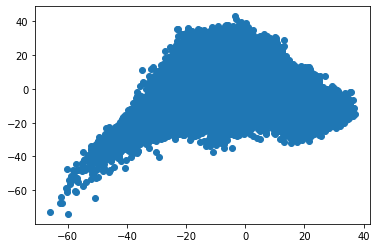

In [15]:
plt.scatter(subs_ca['PC1'], subs_ca['PC2'])

In [16]:
merged_con.close()

In [17]:
subs_con = loompy.connect(subs_file)

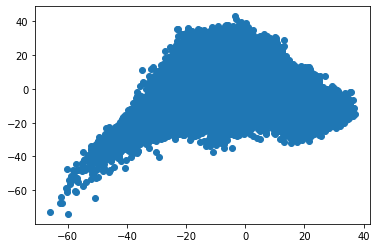

In [18]:
plt.scatter(subs_con.ca['PC1'], subs_con.ca['PC2'])

In [19]:
subs_con.close()